## Linear Regression Project : Ecommerce Clients

### Objective

The goal of this project is to help an e-commerce company determine whether they should focus on improving their mobile app experience or their website. 
We will analyze customer data to understand which platform contributes more to revenue generation using linear regression with gradient descent.

#### Dataset Overview:
The [dataset](https://www.kaggle.com/datasets/iyadavvaibhav/ecommerce-customer-device-usage) contains key features about customer behavior, including:

**Avg. Session Length** – Average time spent in advisory sessions.\
**Time on App** – Average time spent on the mobile application (in minutes).\
**Time on Website** – Average time spent on the website (in minutes).\
**Length of Membership** – How long a customer has been a member (in years).\
**Yearly Amount Spent (Target Variable)** – The amount a customer spends in a year.

#### Business Problem Statement:
The company wants to allocate its budget more efficiently. Should they invest more in their mobile app or in website improvements? This analysis will provide a data-driven recommendation.

### Data Exploration and Cleaning

In [1]:
#importing libraries for data handling and visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('Dataset/Ecommerce Customers.csv')

In [3]:
#loading the firt 5 rows of the dataset
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Removing non-numeric columns like (`Email`, `Address` and `Avatar`) as they aren't useful for our regression model.

In [4]:
df = df.drop(columns=['Email', 'Address', 'Avatar'])

In [5]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 500 rows and 5 columns


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

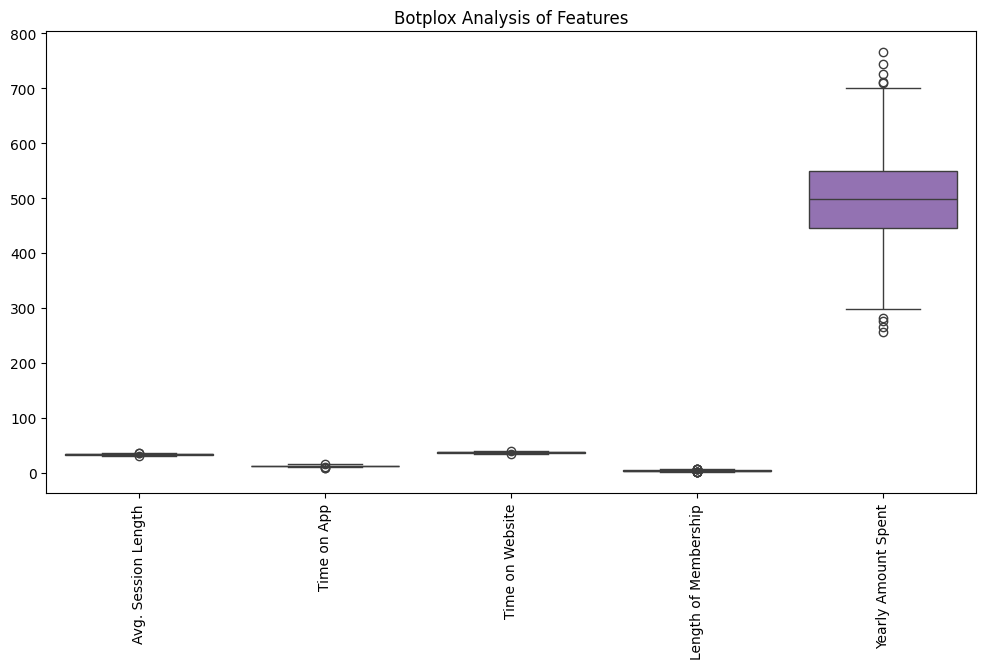

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot Analysis of Features')
plt.show()

In [10]:
#Compute IQR
Q1 = df['Yearly Amount Spent'].quantile(0.25)
Q3 = df['Yearly Amount Spent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

outliers = df[ (df['Yearly Amount Spent'] < lower_bound) | (df['Yearly Amount Spent'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
outliers.head()

Number of outliers: 9


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
50,33.256335,13.858062,37.780265,5.976768,725.584814
65,34.374258,15.126994,37.157624,5.377594,765.518462
157,34.603311,12.207298,33.913847,6.922689,744.221867
205,34.967610,13.919494,37.952013,5.066697,712.396327
225,32.836941,10.256549,36.143908,0.789520,256.670582


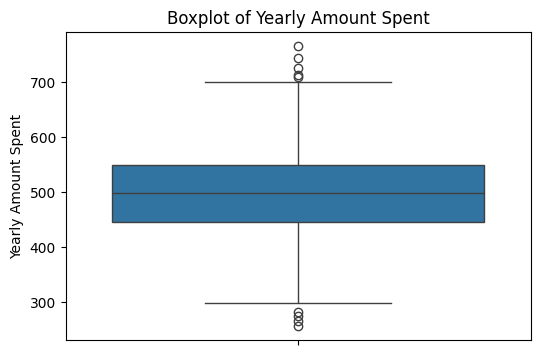

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Yearly Amount Spent'])
plt.title('Boxplot of Yearly Amount Spent')
plt.show()

We checked for outliers in "Yearly Amount Spent using the IQR method and found 9 potential outliers.\
However, these data points seem to represent high and low value customers. Since removing them may lead to biased insights, we will keep them in our dataset.

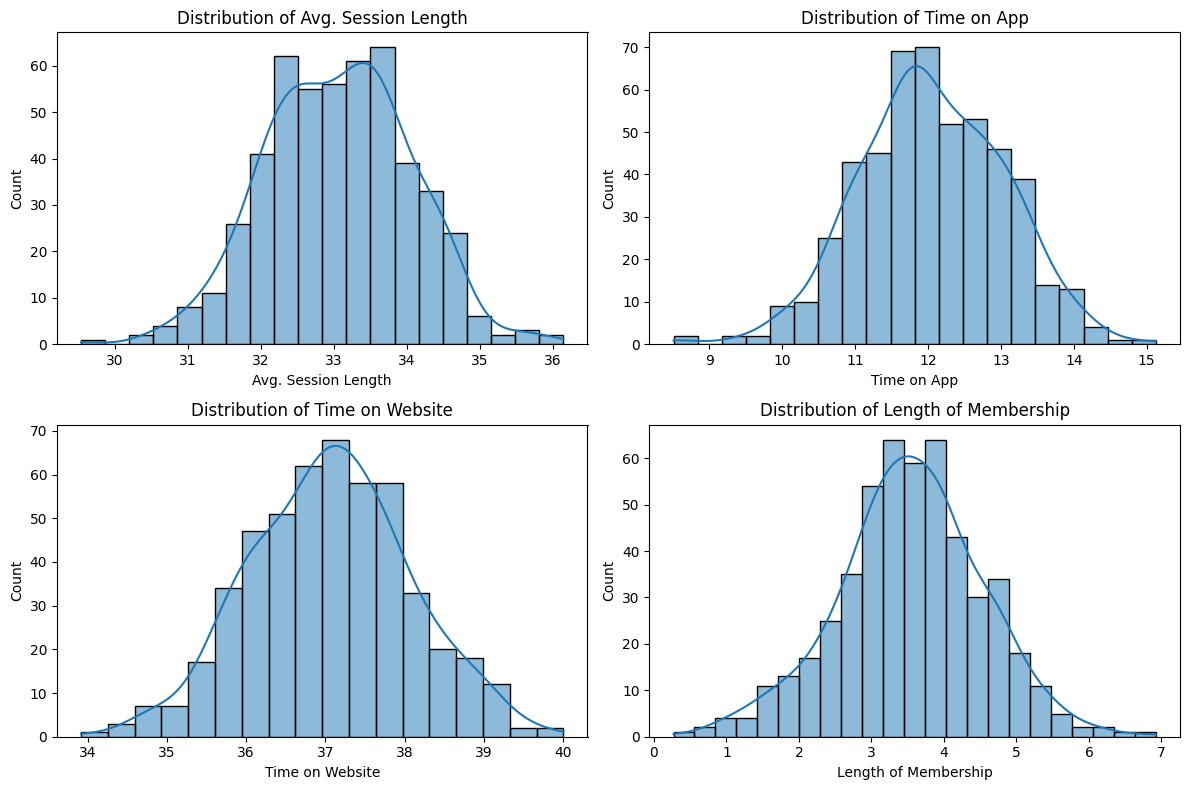

In [47]:
# Feature Distribution Check
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
columns = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']

for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

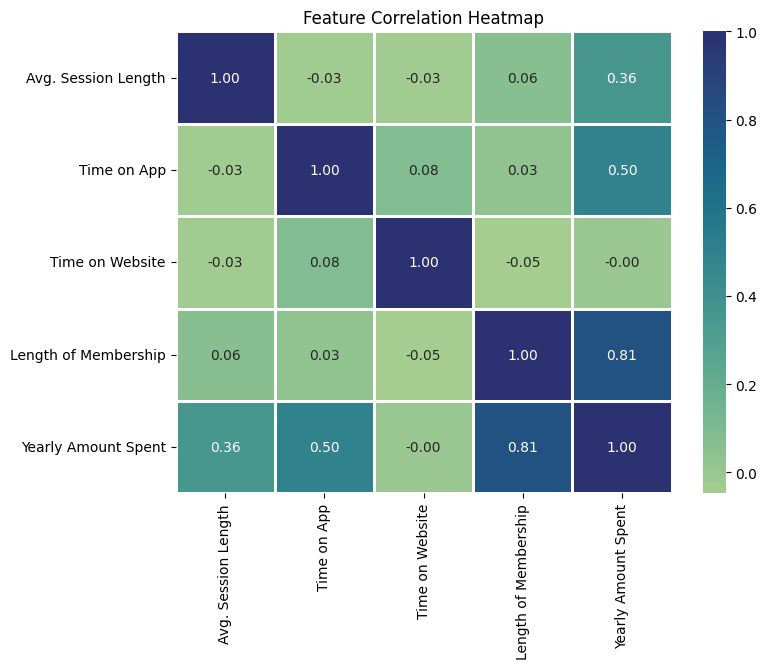

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='crest', fmt='.2f', linewidths=2)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Business Takeaways

- `Invest in the Mobile App`: The app is already driving spending, and further improvements will likely increase revenue.

- `Investigate Website Usage`: Analysis is required to understand why is the website not driving spending.

- `Test Website Enhancements`: Use A/B testing or customer research to determine if website changes can automatically increase revenue.

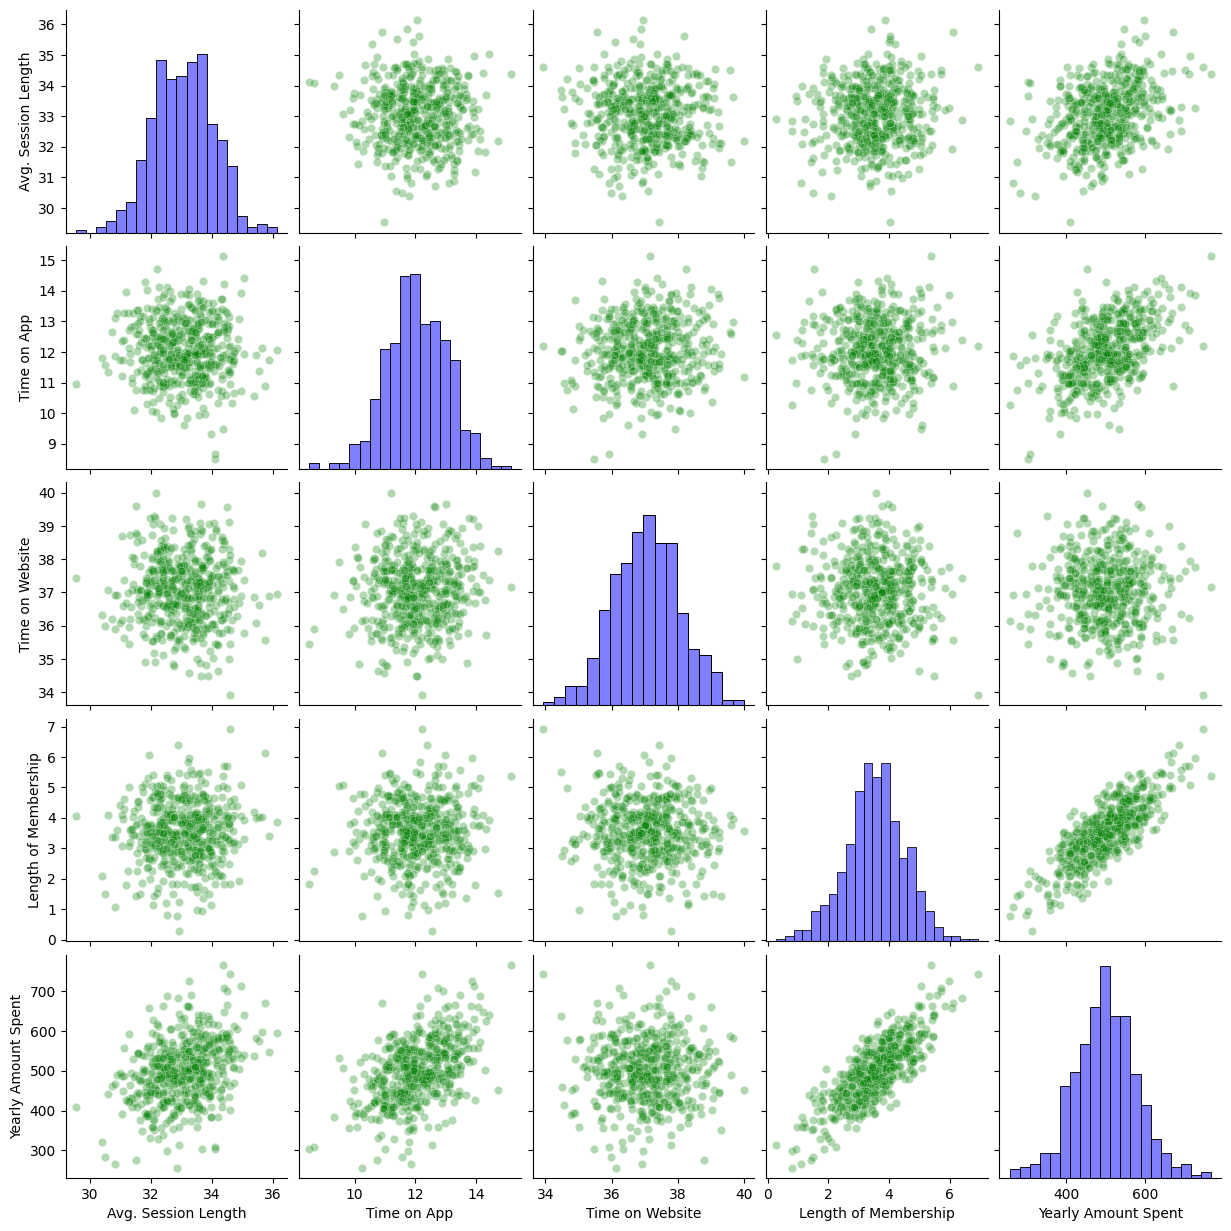

In [12]:
sns.pairplot(df, plot_kws={'color': 'green', 'alpha': 0.3}, diag_kws={'color': 'blue', 'alpha': 0.5})
plt.show()

#### Key Takeaways:  

- **Length of Membership vs Yearly Amount Spent:** Shows a **strong positive linear trend**, confirming that customers who have been members longer tend to spend more.  

These observations help us confirm which features are **important for our regression model**.

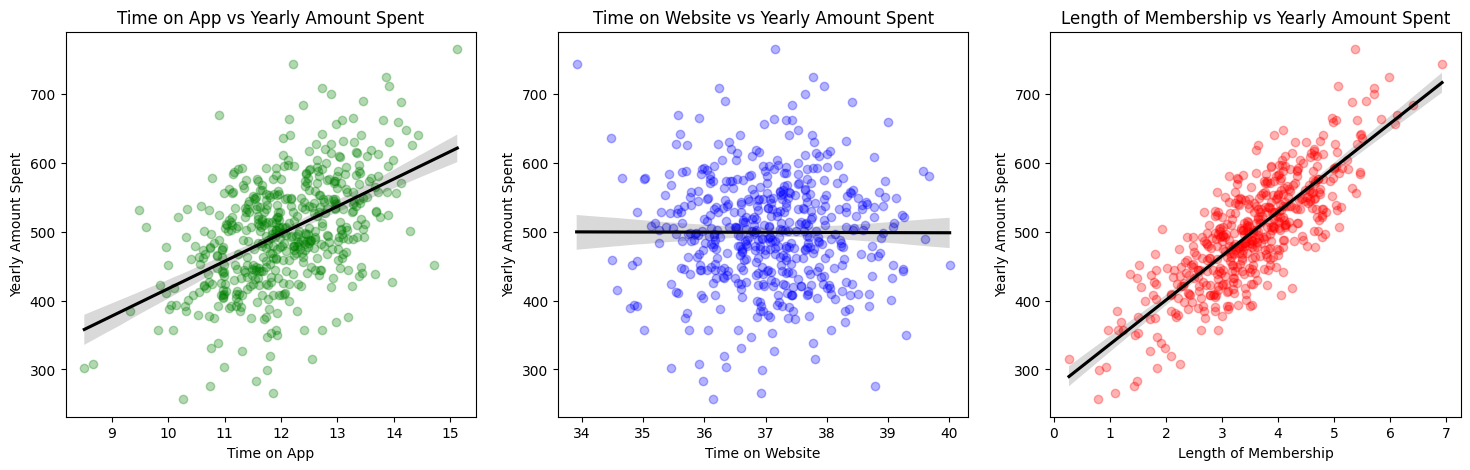

In [13]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for Time on App vs Yearly Amount Spent
sns.regplot(x=df["Time on App"], y=df["Yearly Amount Spent"], ax=axes[0], scatter_kws={'color':'green', 'alpha':0.3}, line_kws={'color':'black'})
axes[0].set_title("Time on App vs Yearly Amount Spent")

# Scatter plot for Time on Website vs Yearly Amount Spent
sns.regplot(x=df["Time on Website"], y=df["Yearly Amount Spent"], ax=axes[1], scatter_kws={'color':'blue', 'alpha':0.3}, line_kws={'color':'black'})
axes[1].set_title("Time on Website vs Yearly Amount Spent")

# Scatter plot for Length of Membership vs Yearly Amount Spent
sns.regplot(x=df["Length of Membership"], y=df["Yearly Amount Spent"], ax=axes[2], scatter_kws={'color':'red', 'alpha':0.3}, line_kws={'color':'black'})
axes[2].set_title("Length of Membership vs Yearly Amount Spent")

plt.show()

#### Key Takeaways:  

- **Time on App vs Yearly Amount Spent:** Displays an **upward trend**, suggesting that increasing app usage could increase revenue.  
- **Time on Website vs Yearly Amount Spent:** No significant trend, confirming the **weak correlation** from the heatmap.  
- **Length of Membership vs Yearly Amount Spent:** A **strong linear trend**, further validating its importance in predicting spending.  

From these insights, we confirm that `Length of Membership` and `Time on App` are **key factors** for predicting `Yearly Amount Spent`, while `Time on Website` might not be as impactful.

### Data Splitting

Based on our correlation analysis and visualizations, we select features that contribute to predicting `Yearly Amount Spent`.  
These features have been chosen because they show meaningful relationships with the target variable.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('Yearly Amount Spent', axis=1)
Y = df['Yearly Amount Spent']

In [16]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [17]:
X.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462
std,0.992563,0.994216,1.010489,0.999278
min,29.532429,8.508152,33.913847,0.269901
25%,32.341822,11.388153,36.349257,2.930450
50%,33.082008,11.983231,37.069367,3.533975
75%,33.711985,12.753850,37.716432,4.126502
max,36.139662,15.126994,40.005182,6.922689


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
print(f"Training Set: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Set: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training Set: X_train: (400, 4), Y_train: (400,)
Testing Set: X_test: (100, 4), Y_test: (100,)


### Model Training and Evaluation

In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [21]:
#feature scaling
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
baseline_model = LinearRegression()

In [25]:
# Performing 5 fold cross validation on training data
cv_score = cross_val_score(baseline_model, X_train_scaled, Y_train, cv=5, scoring='r2')

In [48]:
print("Cross Validation R^2 Scores:", cv_score)
print("Mean CV R^2 Score:", cv_score.mean())
print("Standard Deviation of CV R^2 Score:", cv_score.std())

Cross Validation R^2 Scores: [0.98720948 0.98583208 0.98345934 0.98504677 0.98288566]
Mean CV R^2 Score: 0.9848866677232957
Standard Deviation of CV R^2 Score: 0.0015720172357053914


In [27]:
baseline_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [28]:
baseline_pred = baseline_model.predict(X_test_scaled)

In [29]:
baseline_mse = mean_squared_error(Y_test, baseline_pred)
baseline_r2 = r2_score(Y_test, baseline_pred)

In [30]:
print(f"Baseline Model MSE: {baseline_mse:.2f}")
print(f"Baseline Model R² Score: {baseline_r2:.4f}")

Baseline Model MSE: 109.86
Baseline Model R² Score: 0.9778


In [31]:
def gradient_descent(X, Y, theta, rate, iterations):
    m = len(Y) # number of training samples 
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        theta = theta - (rate/m) * X.T.dot(X.dot(theta) - Y)
        cost_history[i] = (1 / (2 * m)) * np.sum((X.dot(theta) - Y) ** 2)  
         
        # Debugging every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost_history[i]}")
    
    return theta, cost_history  

In [32]:
# Prepare Data
X_train_scaled_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # Add bias
y_train_np = Y_train.values.reshape(-1, 1)  # Reshape target

In [33]:
# Initialize theta
theta_init = np.zeros((X_train_scaled_bias.shape[1], 1))

In [34]:
# Define hyperparameters
learning_rate = 0.01
iterations = 1000

In [35]:
# Train Model
theta_final, cost_history = gradient_descent(X_train_scaled_bias, y_train_np, theta_init, learning_rate, iterations)

Iteration 0, Cost: 126710.07787689184
Iteration 100, Cost: 16977.72549706724
Iteration 200, Cost: 2311.2941847449247
Iteration 300, Cost: 350.57081683028565
Iteration 400, Cost: 88.39049895051632
Iteration 500, Cost: 53.32608175418937
Iteration 600, Cost: 48.635703920363184
Iteration 700, Cost: 48.008199943934926
Iteration 800, Cost: 47.924237284603315
Iteration 900, Cost: 47.9130012961658


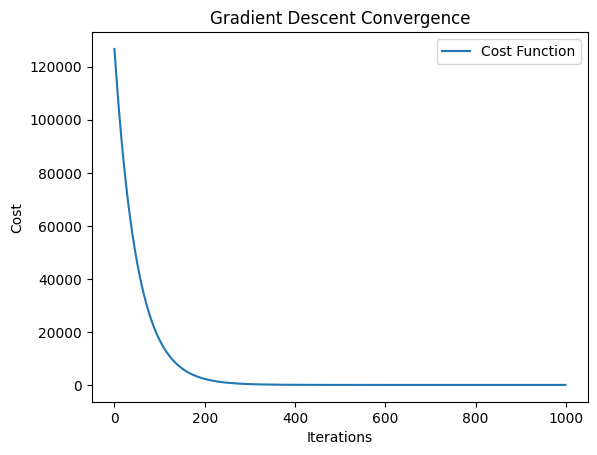

In [36]:
# Plot Cost Function 
plt.plot(range(iterations), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

In [37]:
# Display final weights
print("Final Weights (Theta):", theta_final.ravel())

Final Weights (Theta): [5.01970480e+02 2.52497043e+01 3.87027089e+01 3.15493556e-01
 6.35413995e+01]


In [38]:
print("Final Shape of theta:", theta_final.shape)
print("Expected Shape (Features + Bias, 1):", (X_train_scaled_bias.shape[1], 1))

Final Shape of theta: (5, 1)
Expected Shape (Features + Bias, 1): (5, 1)


In [39]:
# Add bias term (column of ones) to X_test_scaled
X_test_scaled_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

In [40]:
# Compute predictions using the trained weights
y_pred = X_test_scaled_bias @ theta_final  # Matrix multiplication

In [41]:
# Display first 5 predictions
print("Predicted Values (First 5):", y_pred[:5].ravel())

Predicted Values (First 5): [402.84294568 542.51065568 426.59995012 501.89261103 409.64724599]


In [42]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(Y_test, y_pred)  # R² Score

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 109.83
Root Mean Squared Error (RMSE): 10.48
R² Score: 0.9778


### Model Interpretation & Business Insights

After training and evaluating our Linear Regression model, we now analyze its impact on business decisions.  

#### - **Key Model Performance Metrics**
- **MSE (109.83):** Indicates the average squared error in predictions.
- **RMSE (10.48):** The model's predictions are, on average, **$10.48 off** from actual yearly spending.
- **R² Score (0.9778):** The model explains **97.78% of the variance** in `Yearly Amount Spent`, meaning it is highly predictive.

#### - **Feature Impact on Yearly Spending**
Using the trained model’s weights, we analyze which factors influence customer spending the most:

| Feature | Weight (Theta) | Impact on Spending |
|---------|--------------|--------------------|
| **Bias (Intercept)** | `~501.97` | Baseline yearly spending (before considering features) |
| **Avg. Session Length** | `~25.25` | Small positive influence on spending |
| **Time on App** | `~38.70` | Strong influence, **customers who use the app more spend more** |
| **Time on Website** | `~3.15` | **Weak influence**, meaning improving the website may not boost revenue significantly |
| **Length of Membership** | `~63.54` | **Biggest driver**, long-term members spend more |

#### - **Business Takeaways & Recommendations** :Investing in the Mobile App vs. Website

1. **Cost-Benefit Analysis**
- **Mobile App ROI:** Our analysis shows that **Time on App** has a **strong positive impact** on spending. Investing in new app features may directly increase revenue.
- **Website ROI:** The **weak correlation** between `Time on Website` and spending suggests **limited returns** from website upgrades.

2. **Investment Considerations**
- **Mobile App Improvement Costs:** Estimated development costs might range from **$50,000 - $200,000**, depending on features.
- **Website Redesign Costs:** May require **$20,000 - $100,000** for a full revamp.

3. **Actionable Recommendations**
- **Run A/B Testing:** Test new app features **on a small group of customers** before full investment.
- **Customer Surveys:** Conduct research to understand **why website engagement is low**.
- **Customer Retention Strategy:** Since `Length of Membership` is the **biggest predictor** of spending, a **loyalty program** may yield long-term revenue growth.

Final Decision: **Prioritize Mobile App Improvements First**
